In [257]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression



In [428]:
X, y = make_regression(n_samples=100, n_features=15, n_targets=1, noise=40, random_state=42)



<Axes: >

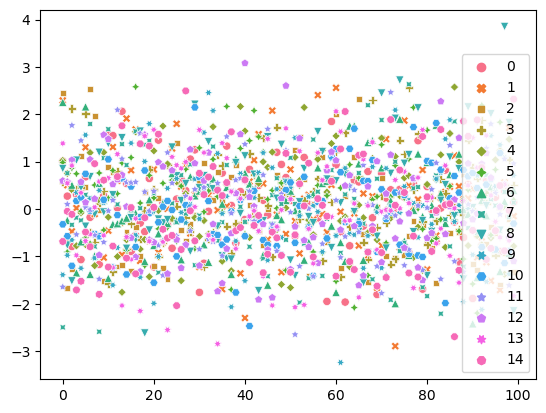

In [429]:
sns.scatterplot(X)


In [430]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [431]:
#linear Regression 
from sklearn.linear_model import LinearRegression 
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [432]:
r2=r2_score(y_pred,y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
    
print(f"  Regression:")
print(f"  R² Score: {r2:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print("="*40)

  Regression:
  R² Score: 0.9062
  MAE: 34.0610
  MSE: 1777.7774
  RMSE: 42.1637


In [433]:
from sklearn.linear_model import Ridge ,RidgeCV , Lasso,LassoCV,ElasticNet,ElasticNetCV

In [434]:
# Create and fit RidgeCV model
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)  # alpha values range for cross-validation
ridge_cv.fit(X_train, y_train)

# Best alpha found by cross-validation
print(f"Best Alpha: {ridge_cv.alpha_}")

# Coefficients of the model
print(f"Coefficients: {ridge_cv.coef_}")

Best Alpha: 1.0
Coefficients: [ 25.22332791  75.21575764 -10.8564328    2.42764881  58.44763352
  16.18192401  43.11352178  25.01828245   1.62415843  67.66938583
   3.05365415  79.03486671   1.19977869  -3.00263402  80.23570712]


In [435]:
#ridge 
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

In [436]:
r2=r2_score(y_pred_ridge,y_test)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
    
print(f"  Regression:")
print(f"  R² Score: {r2:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print("="*40)

  Regression:
  R² Score: 0.9055
  MAE: 34.1438
  MSE: 1785.4148
  RMSE: 42.2542


In [437]:
# Create and fit LassoCV model
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha found by cross-validation
print(f"Best Alpha: {lasso_cv.alpha_}")

# Coefficients of the model
print(f"Coefficients: {lasso_cv.coef_}")

Best Alpha: 1.8875596713377212
Coefficients: [22.31538959 73.64740463 -8.25887022  0.         56.83789945 13.54969943
 41.33636152 23.19329343  0.         68.7599308   0.30346911 80.70633862
  0.         -0.97724095 78.46555598]


In [438]:
#lasso 
lasso=Lasso(alpha=0.046)
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)

In [439]:
r2=r2_score(lasso_pred,y_test)
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
    
print(f"  Regression:")
print(f"  R² Score: {r2:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print("="*40)

  Regression:
  R² Score: 0.9062
  MAE: 34.0465
  MSE: 1773.9914
  RMSE: 42.1188


In [440]:
elastic_cv = ElasticNetCV(cv=5, random_state=42)
elastic_cv.fit(X_train, y_train)

# Best alpha and l1_ratio values found by cross-validation
print(f"Best Alpha: {elastic_cv.alpha_}")
print(f"Best L1 Ratio: {elastic_cv.l1_ratio_}")

# Coefficients of the model
print(f"Coefficients: {elastic_cv.coef_}")

Best Alpha: 0.1752255178651794
Best L1 Ratio: 0.5
Coefficients: [ 24.22395655  68.81787508 -11.32290999   4.22200678  53.26113976
  16.24778892  37.11717628  21.06615554   1.53054801  62.45449256
   5.42644194  74.07746919   1.119587    -5.07085328  72.53625576]


In [441]:
#elastic 
elastic=ElasticNet(alpha=0.0937,l1_ratio=0.5)
elastic.fit(X_train,y_train)
y_pred_elastic=elastic.predict(X_test)

In [442]:
r2=r2_score(y_pred_elastic,y_test)
mae = mean_absolute_error(y_test, y_pred_elastic)
mse = mean_squared_error(y_test, y_pred_elastic)
rmse = np.sqrt(mse)
    
print(f"  Regression:")
print(f"  R² Score: {r2:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print("="*40)

  Regression:
  R² Score: 0.8767
  MAE: 38.2200
  MSE: 2097.3082
  RMSE: 45.7964


In [443]:
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "ElasticNet Regression"],
    "R² Score": [
        r2_score(y_pred, y_test),
        r2_score(y_pred_ridge, y_test),
        r2_score(lasso_pred, y_test),
        r2_score(y_pred_elastic, y_test)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, lasso_pred),
        mean_absolute_error(y_test, y_pred_elastic)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, lasso_pred),
        mean_squared_error(y_test, y_pred_elastic)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, lasso_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_elastic))
    ]
}


results_df = pd.DataFrame(results)


print(results_df)

                   Model  R² Score        MAE          MSE       RMSE
0      Linear Regression  0.906164  34.061003  1777.777404  42.163698
1       Ridge Regression  0.905480  34.143788  1785.414793  42.254169
2       Lasso Regression  0.906205  34.046508  1773.991367  42.118777
3  ElasticNet Regression  0.876674  38.219984  2097.308160  45.796377
